## 1. Standard Imports

In [1]:
import numpy as np
import torch 

from IPython import display
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
# NEW!
import torchvision
import torchvision.transforms as T

- The torchvision library consists of :

    - popular datasets, 
    - model architectures, and 
    - image transformations for computer vision.
    
- Torchvision provides additional functionalities to manipulate and process images with standard image processing algorithms.


## 2. Import Dataset

In [4]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [5]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [6]:
# Total classes : unique categories
cdata.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
cdata.data.shape

# 50000 : Datapoints
# 32x32 : Height and width
# 3     : Number of input channels(RGB)

(50000, 32, 32, 3)

In [8]:
cdata.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [9]:
len(cdata.targets)

50000

In [10]:
type(cdata.targets)

list

In [11]:
set(cdata.targets)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## 3. Visualizing the dataset

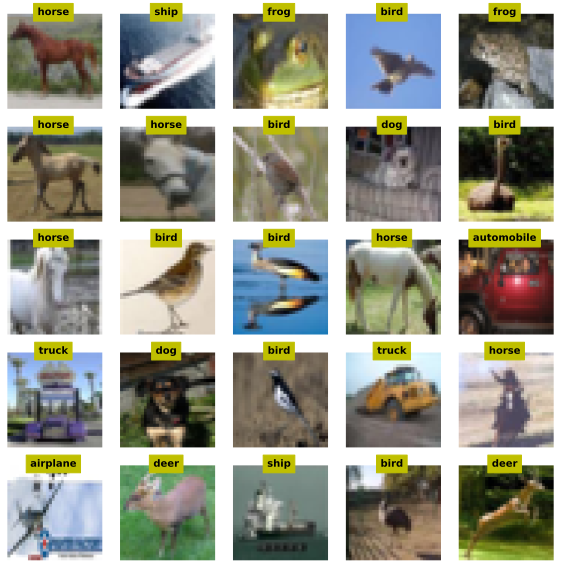

In [20]:
# Inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(8,8), dpi=135)

for ax in axs.flatten():

    # select a random picture
    randidx = np.random.choice(len(cdata.targets))

    # extract that image
    pic = cdata.data[randidx,:,:,:]
    # and its label
    label = cdata.classes[cdata.targets[randidx]]

    # and show!
    ax.imshow(pic)
    # Add text to the Axes.
    # ha : horizontal alignment
    ax.text(15,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 4. Apply some transformations

In [21]:
Ts = T.Compose([ T.ToTensor(), # Convert a 'PIL Image' or 'numpy.ndarray' to tensor.
                 T.Resize(32*4),# output image size : 128x128
                 T.Grayscale(num_output_channels=1)  ])

# include the transform in the dataset
cdata.transform = Ts

# you can also apply the transforms immediately when loading in the data
# cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True, transform=Ts)


# Important! Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


#### After applying the dataset

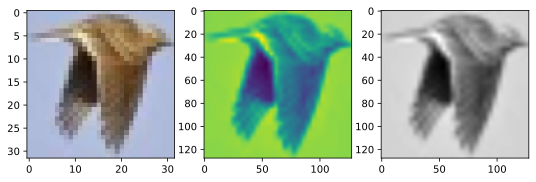

In [23]:
# option 1a: apply the transform "externally" to an image
img1 = Ts( cdata.data[123,:,:,:] )

# option 1b: use the embedded transform
img2 = cdata.transform( cdata.data[123,:,:,:] )

# let's see what we've done!
fig,ax = plt.subplots(1,3,figsize=(9,3))

ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')

plt.show()

In [26]:
# Note about ToTensor() and normalization:
help(T.ToTensor())

Help on ToTensor in module torchvision.transforms.transforms object:

class ToTensor(builtins.object)
 |  ToTensor() -> None
 |  
 |  Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor. This transform does not support torchscript.
 |  
 |  Converts a PIL Image or numpy.ndarray (H x W x C) in the range
 |  [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
 |  if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
 |  or if the numpy.ndarray has dtype = np.uint8
 |  
 |  In the other cases, tensors are returned without scaling.
 |  
 |  .. note::
 |      Because the input image is scaled to [0.0, 1.0], this transformation should not be used when
 |      transforming target image masks. See the `references`_ for implementing the transforms for image masks.
 |  
 |  .. _references: https://github.com/pytorch/vision/tree/main/references/segmentation
 |  
 |  Methods defined here:
 |  
 |  __call__(self, pic)
 |      Args:
 |  